In [50]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz


In [51]:
df = pd.read_csv("CoffeeBeansCleaned.csv")
df2 = pd.read_csv("CoffeeBeansCleaned.csv")

In [52]:
df2.head()

,Variety,Shape,Sieve,Aroma,Flavor,Aftertaste,Acidity,Body,Uniformity,Balance,clean cup,Sweetness,Taster´s score,Final score
0,CO,PE,13,6.50,6.00,6.00,6.00,6.0,10.0,6.0,10,10,6.0,72.50
1,CO,PE,13,6.00,6.00,6.00,6.00,6.0,10.0,6.0,10,10,6.0,72.00
2,CO,PE,13,6.75,6.00,6.00,6.00,6.0,10.0,6.0,10,10,6.0,72.75
3,CO,PE,13,6.75,6.50,6.50,6.00,6.0,10.0,6.0,10,10,6.0,73.75
4,CO,MI,13,6.75,6.25,6.25,6.25,6.5,10.0,6.5,10,10,6.5,75.00


In [119]:
#Splitting
X = df.drop(['Shape'], axis = 1)
y = df['Shape']

training, testing, training_labels, testing_labels = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y, random_state=0)
#training, testing => x
#training_labels, testing_labels => y

# check the shape of X_train and X_test
training.shape,testing.shape

((136, 13), (46, 13))

In [120]:
ord_enc = OrdinalEncoder()
training["Sieve"] = ord_enc.fit_transform(training[["Sieve"]])
training["Variety"] = ord_enc.fit_transform(training[["Variety"]])
testing["Sieve"] = ord_enc.fit_transform(testing[["Sieve"]])
testing["Variety"] = ord_enc.fit_transform(testing[["Variety"]])



In [121]:
#Normaalization
# Normalize the data
sc = StandardScaler()
normed_train_data = pd.DataFrame(sc.fit_transform(training), columns = training.columns)
#normed_test_data = pd.DataFrame(sc.fit_transform(testing), columns = testing.columns)

# Building the Random Forest

In [122]:
clf = RandomForestClassifier()
clf.fit(training, training_labels)

RandomForestClassifier()

In [123]:
#y-pred
preds = clf.predict(testing)

In [144]:
print (clf.score(training, training_labels))

0.9852941176470589


In [145]:
print(clf.score(testing, testing_labels))

0.8478260869565217


In [142]:
accuracy = metrics.accuracy_score(testing_labels, preds)
print(accuracy)

0.8478260869565217


In [143]:
#Weighted_average for each shape since we have highly imbalanced data and this causes 
#the classifier to recognize some classes better than some other

recall_sensitivity = metrics.recall_score(testing_labels, preds,average="macro")
print(recall_sensitivity)

0.8873563218390804


In [126]:
cm1 = confusion_matrix(testing_labels, preds)
cm1

array([[25,  4,  0],
       [ 3, 12,  0],
       [ 0,  0,  2]])

In [127]:
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Specificity :  0.8


              precision    recall  f1-score   support

          FL       0.89      0.86      0.88        29
          MI       0.75      0.80      0.77        15
          PE       1.00      1.00      1.00         2

    accuracy                           0.85        46
   macro avg       0.88      0.89      0.88        46
weighted avg       0.85      0.85      0.85        46



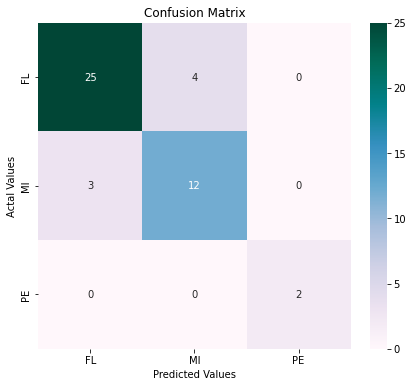

In [140]:
target_names = ['FL', 'MI', 'PE']
print(classification_report(testing_labels, preds))

cm = confusion_matrix(testing_labels, preds)
cm_df = pd.DataFrame(cm,
                     index = ['FL','MI','PE'], 
                     columns = ['FL','MI','PE'])
plt.figure(figsize=(7,6))
sns.heatmap(cm_df, annot=True, cmap='PuBuGn')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [43]:
from sklearn.tree import export_graphviz
from IPython import display
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(testing_labels, preds)

str_tree = export_graphviz(m, 
   out_file=None, 
   feature_names=testing_labels.columns, # column names
   filled=True,        
   special_characters=True, 
   rotate=True, 
   precision=0.6)

display.display(str_tree)

ValueError: could not convert string to float: 'FL'

IndexError: index 2 is out of bounds for axis 0 with size 2

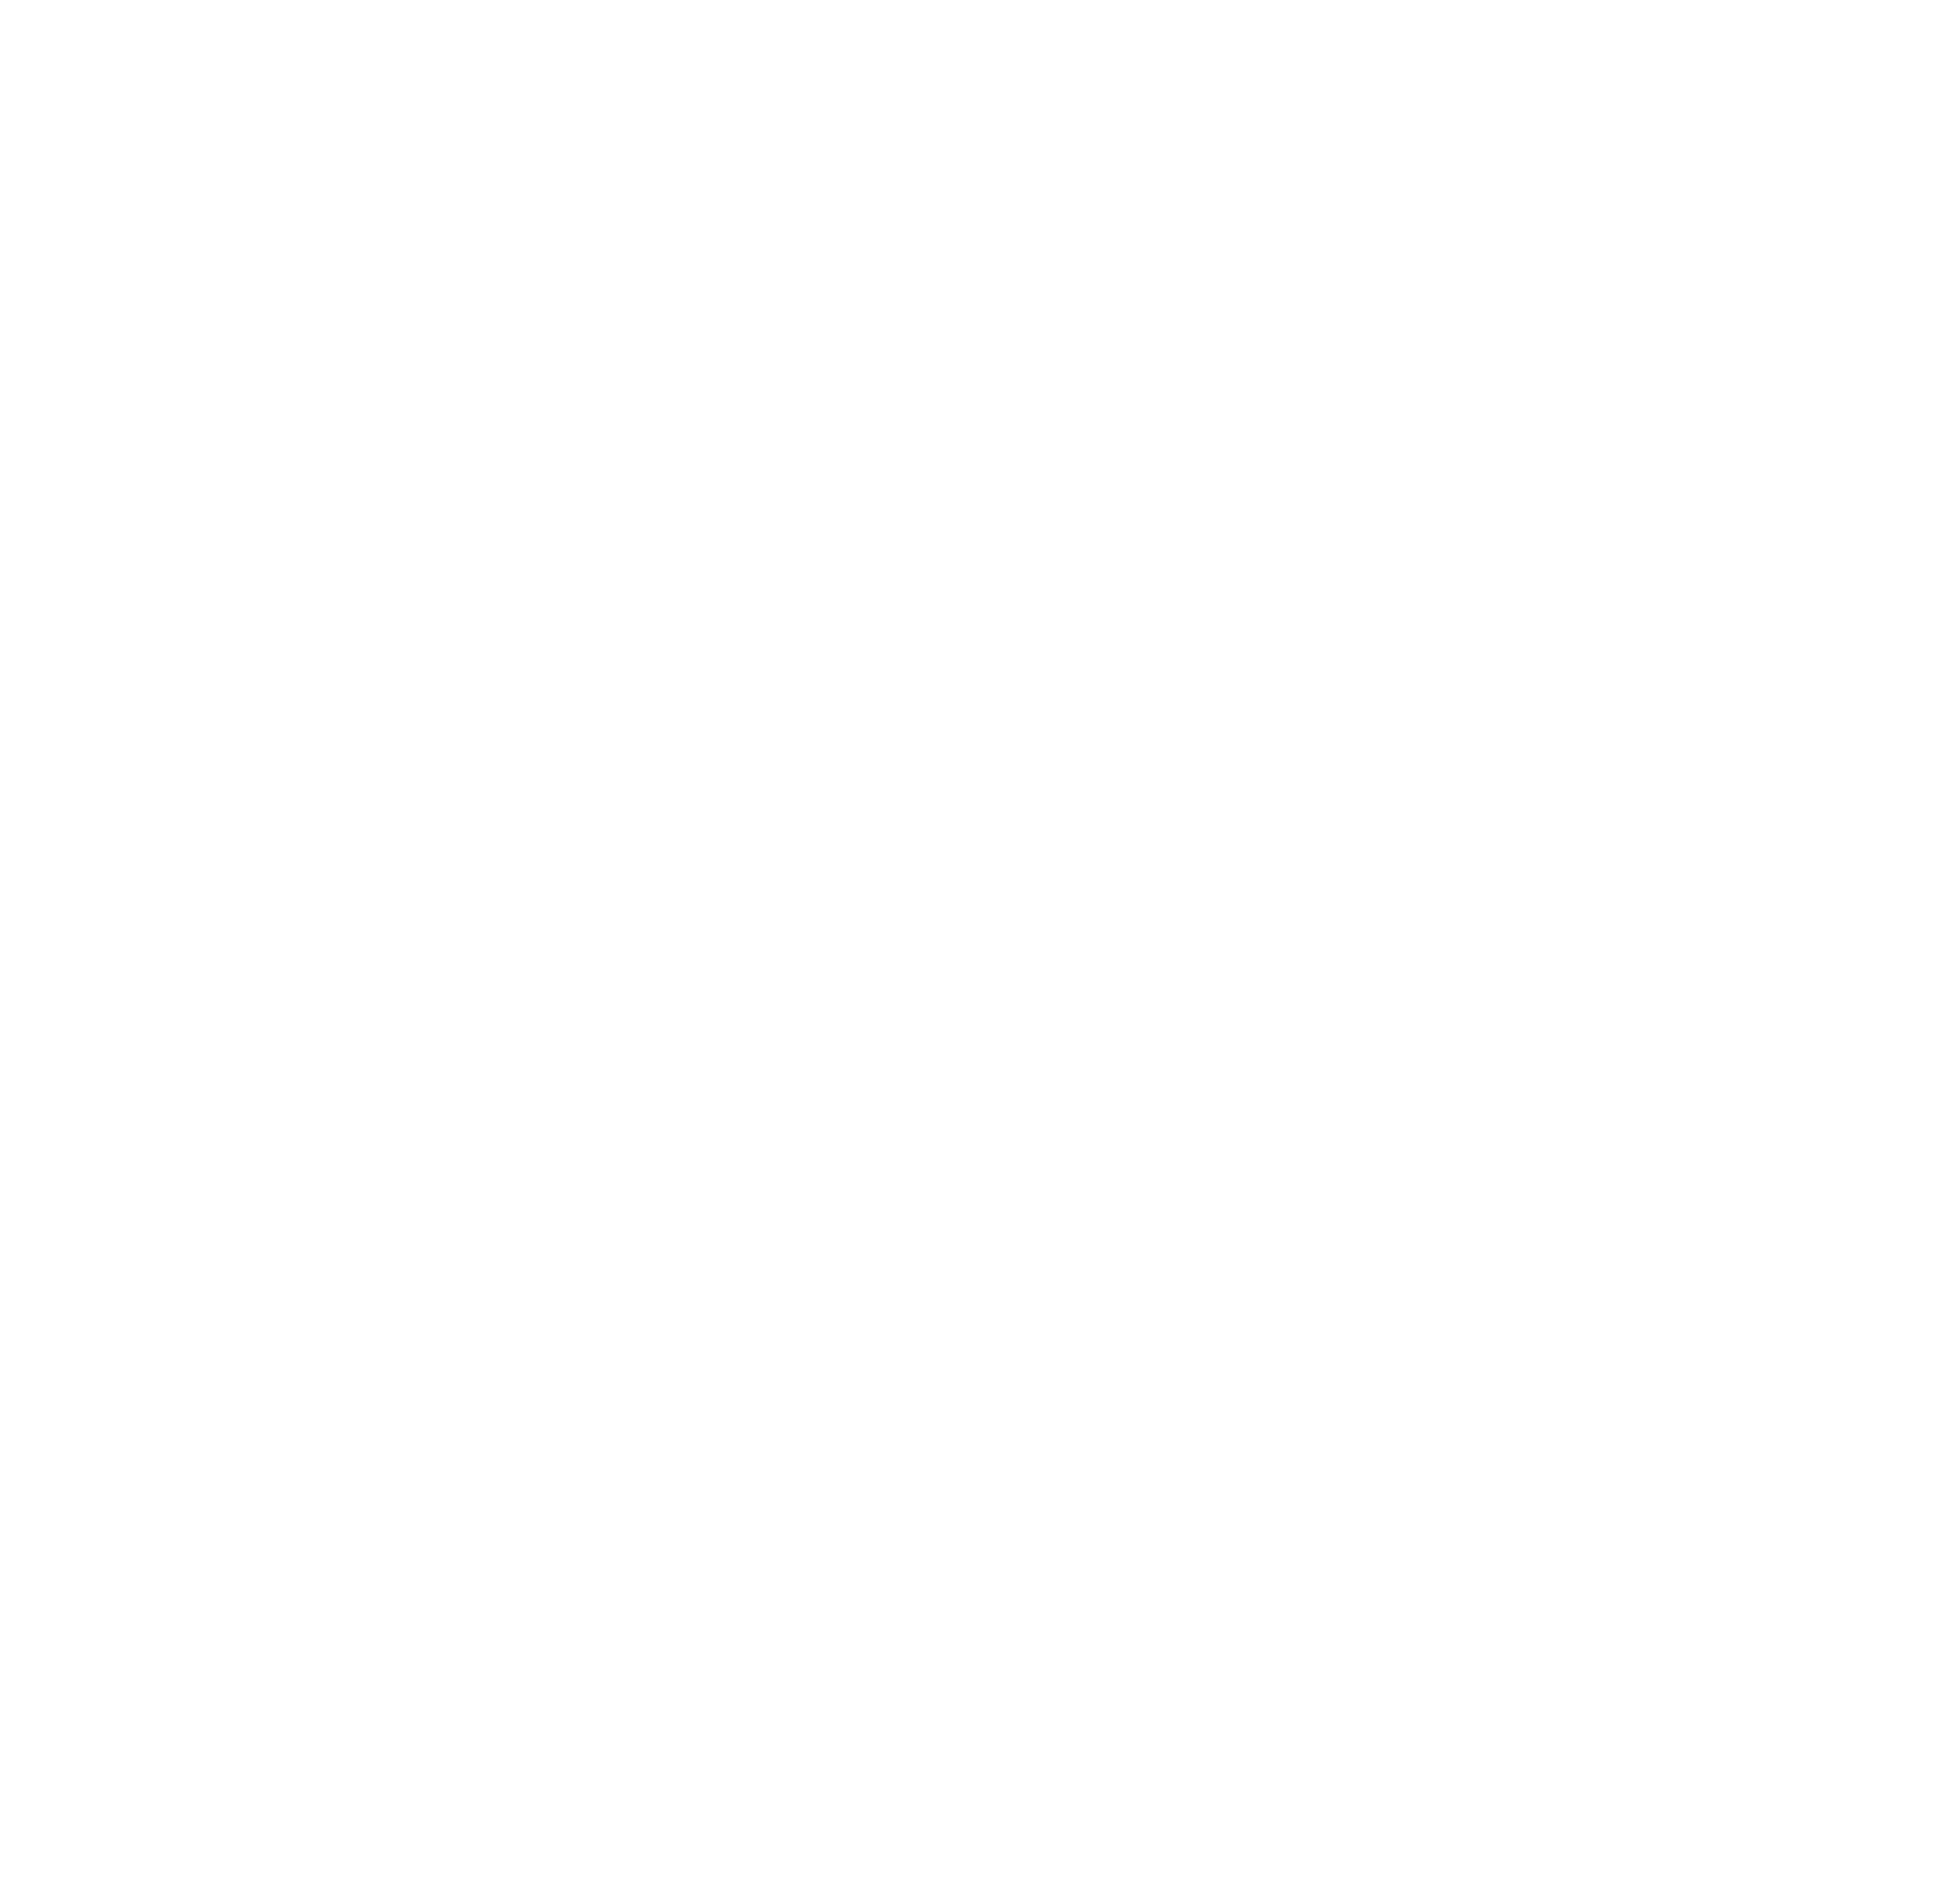

In [45]:
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')